In [1]:
from torch import nn

from multi_modal_edge_ai.models.adl_inference.data_access.parser import parse_file
from multi_modal_edge_ai.models.adl_inference.ml_models.cnn_model import CNNModel
from multi_modal_edge_ai.commons.string_label_encoder import StringLabelEncoder
from multi_modal_edge_ai.models.adl_inference.validating.validate import split_and_validate


(sdf, adf) = parse_file(r'../../public_datasets/Ordonez_Sensors.csv', r'../../public_datasets/Ordonez_ADLs.csv')

adls = adf['Activity'].unique().tolist()
adl_encoder = StringLabelEncoder(adls)

# If you want to replace the existing 'Activity' column with encoded values
adf['Activity'] = adf['Activity'].apply(adl_encoder.encode_label)
default_act = adl_encoder.encode_label('Idle')

sensors = sdf['Sensor'].unique().tolist()

model = CNNModel(6, 3, 160, 300, sensors, len(adls), nn.ReLU(), nn.LogSoftmax(dim=-1))

In [ ]:
result = split_and_validate(data=sdf, ground_truth=adf, model=model, labels=adls, label_encoder = adl_encoder, default_activity=default_act, window_length_seconds=300, window_slide_seconds=150)



Training started....
Epoch 1/10, Loss: 7471.290467626338
Epoch 2/10, Loss: 6023.256276008965
Epoch 3/10, Loss: 5852.853505635798
Epoch 4/10, Loss: 5673.024581458201
Epoch 5/10, Loss: 5630.97591145871
Epoch 6/10, Loss: 5531.067195509159
Epoch 7/10, Loss: 5593.849450830936
Epoch 8/10, Loss: 5491.835087663963
Epoch 10/10, Loss: 5848.84966980199


Training completed.


In [6]:
import pandas as pd

print('\n')
print('Accuracy =' + str(result[0]))



Accuracy =0.8575110456553755


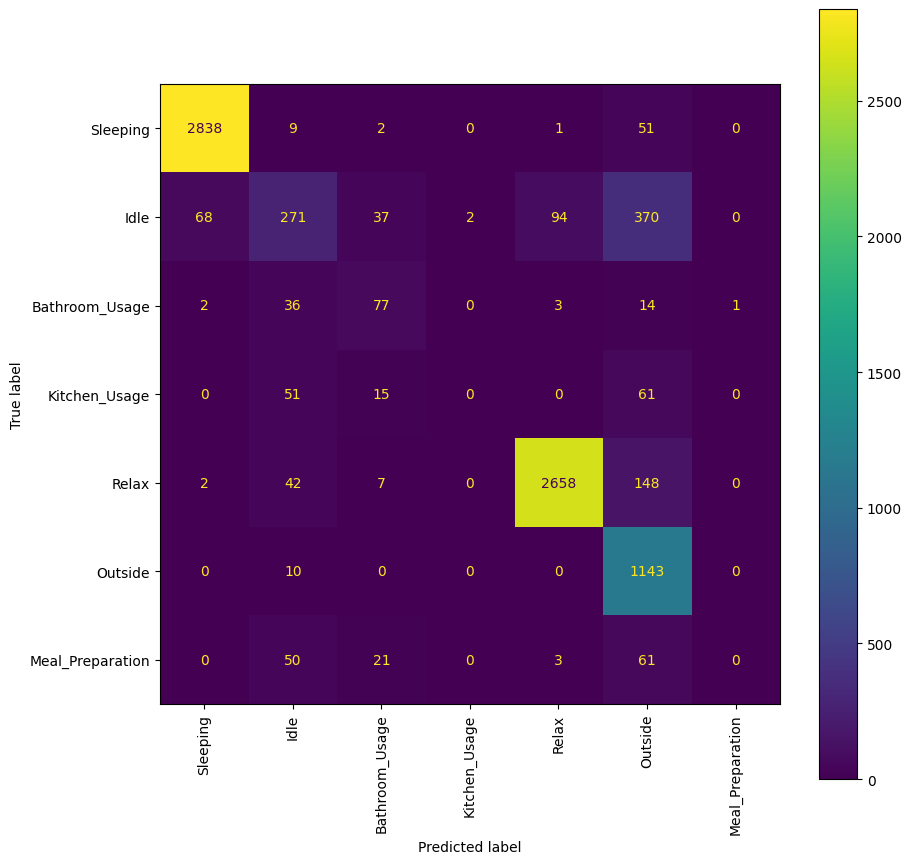

In [7]:
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = result[1], display_labels = adls)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, xticks_rotation='vertical')
plt.show()